<a href="https://colab.research.google.com/github/Ayush-Pathak7/Machine-learning/blob/main/Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries

import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Prepare your data

# Generate some example data (replace with your own dataset)
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)
# Introduce some artificial anomalies
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, outliers])


In [3]:
# Initialize and fit the Isolation Forest model
'''n_estimators: The number of trees in the forest. A value of 100 is often a good starting point.
max_samples: The number of samples to draw to train each tree. 'auto' uses min(256, n_samples), while a float represents the percentage of total samples.
contamination: The expected proportion of outliers in the dataset. This parameter is crucial as it influences the threshold for outlier classification. It can be a float between 0 and 0.5 or 'auto'.
random_state: For reproducibility'''

model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, random_state=42)
model.fit(X)


IsolationForest(contamination=0.05, random_state=42)

In [4]:
# Make predictions and obtain anomaly scores

# Predict anomalies
y_pred = model.predict(X)

# Get anomaly scores
anomaly_scores = model.decision_function(X)


In [5]:
#Analyze results and visualize

print(f"Number of anomalies detected: {list(y_pred).count(-1)}")


Number of anomalies detected: 16


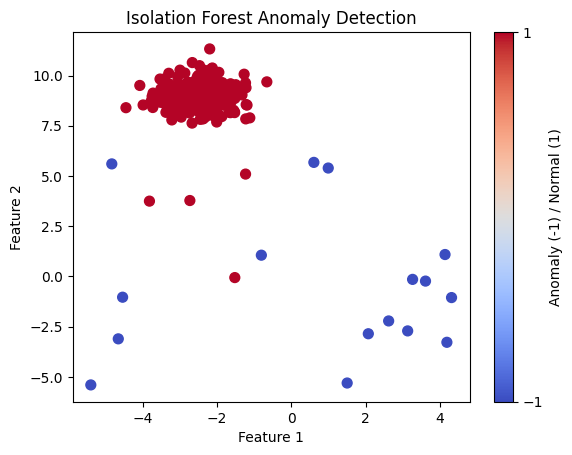

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=50)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(ticks=[-1, 1], label='Anomaly (-1) / Normal (1)')
plt.show()
